#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

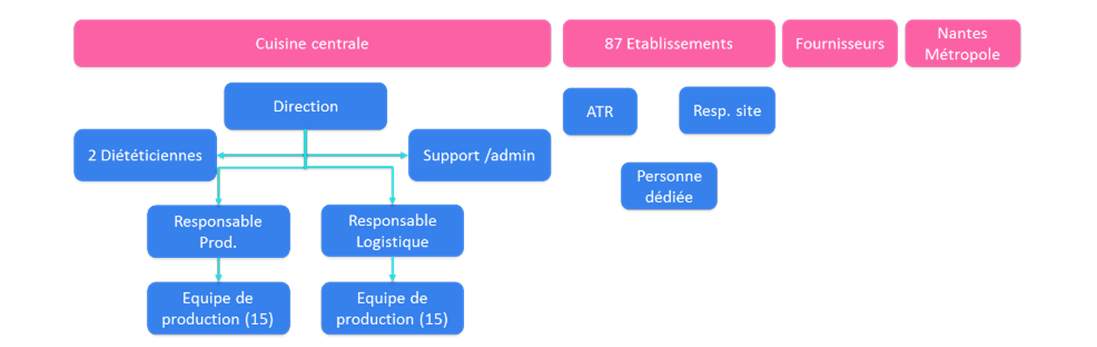

### 4 - Processus actuel

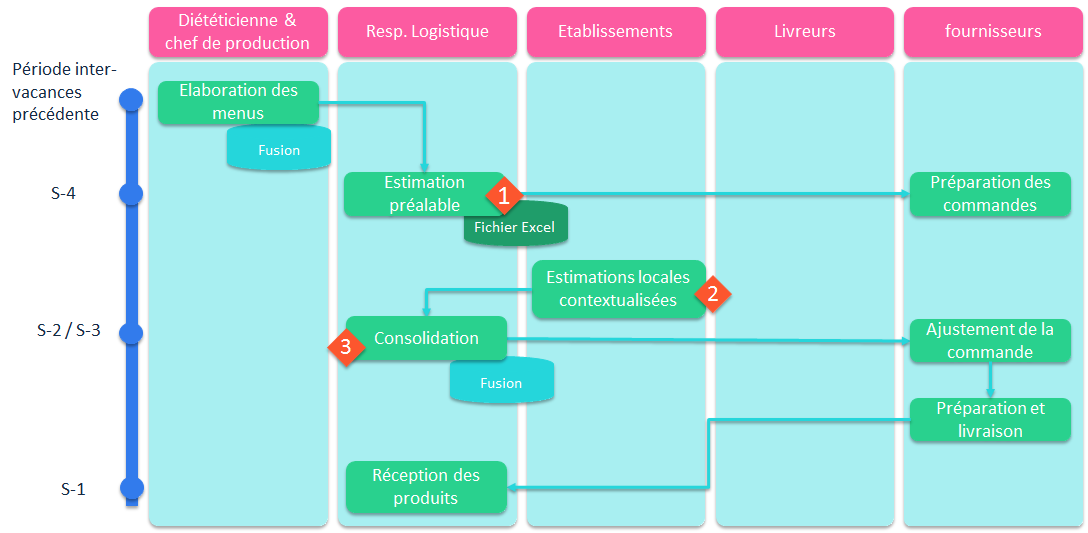

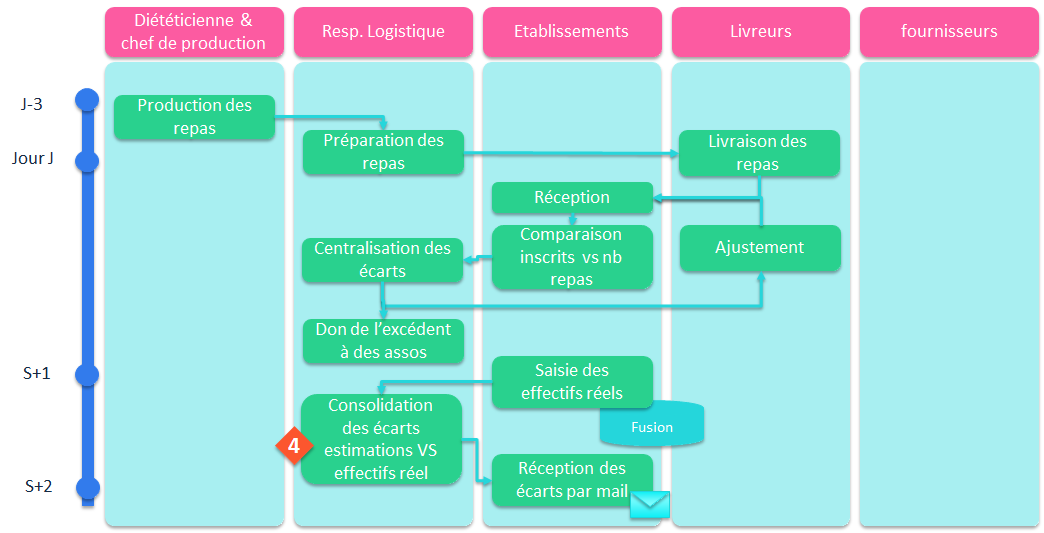

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
frequentation = pd.read_csv("./Dataset/frequentation.csv")

In [3]:
menu = pd.read_csv("./Dataset/menus.csv")

In [4]:
# Information sur la Data 

frequentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1188 non-null   int64 
 1   date             1188 non-null   object
 2   annee_scolaire   1188 non-null   object
 3   jour             1188 non-null   object
 4   semaine          1188 non-null   int64 
 5   mois             1188 non-null   object
 6   greves           1188 non-null   int64 
 7   ferie            1188 non-null   int64 
 8   veille_ferie     1188 non-null   int64 
 9   retour_ferie     1188 non-null   int64 
 10  vacances         1188 non-null   int64 
 11  retour_vacances  1188 non-null   int64 
 12  veille_vacances  1188 non-null   int64 
 13  fete_musulmane   1188 non-null   int64 
 14  ramadan          1188 non-null   int64 
 15  fete_chretienne  1188 non-null   int64 
 16  fete_juive       1188 non-null   int64 
 17  inc_grippe       1188 non-null   

In [5]:
# Présentation des premières lignes 

frequentation.head()

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,0,0,0,0,7200,6453,493,12309,11302,17373


In [6]:
# identifier et supprimer les colonnes inutiles

frequentation = frequentation.drop('Unnamed: 0', axis=1)

In [7]:
# une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global.

frequentation["%Freq"] = frequentation["reel"] / frequentation["effectif"] * 100 

In [8]:
frequentation.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,...,0,0,0,10505,6554,551,12289,11129,17373,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,0,0,0,10505,6554,551,12558,11808,17373,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,0,1,0,10505,6554,551,12753,11741,17373,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,0,1,0,10505,6554,551,12812,12322,17373,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,0,0,0,7200,6453,493,12309,11302,17373,65.054970


In [9]:
# Stats du dataframe

frequentation.describe(include = 'all')

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq
count,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,...,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,141,300,NaN,146,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,0.027778,...,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226,67.852347
std,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,0.164405,...,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762,12.481810
min,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000,0.000000
25%,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000,68.435838
50%,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000,70.311207
75%,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000,72.279556


In [10]:
frequentation.tail()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq
1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,...,0,0,0,1274,9715,99,15991,10898,20685,52.685521
1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,...,0,0,0,1274,9715,99,15885,6442,20685,31.143341
1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,...,0,0,0,1274,9715,99,17436,9168,20685,44.321972
1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,...,0,0,0,1447,6839,441,16062,12371,20685,59.806623
1187,2019-12-19,2019-2020,Jeudi,51,Decembre,1,0,0,0,0,...,0,0,0,1447,6839,441,15936,9556,20685,46.197728


In [11]:
# Verification valeurs manquantes
frequentation.isna().sum()

date               0
annee_scolaire     0
jour               0
semaine            0
mois               0
greves             0
ferie              0
veille_ferie       0
retour_ferie       0
vacances           0
retour_vacances    0
veille_vacances    0
fete_musulmane     0
ramadan            0
fete_chretienne    0
fete_juive         0
inc_grippe         0
inc_gastro         0
inc_varicelle      0
prevision          0
reel               0
effectif           0
%Freq              0
dtype: int64

In [12]:
# Verification des doublons

frequentation.duplicated().sum()

0

Le fichier customers n'a pas de valeurs nulles ni de doublons.

In [13]:
avg_freq = round(frequentation["%Freq"].mean(),2)

print("la frequentation moyenne est : {} %".format(avg_freq))

la frequentation moyenne est : 67.85 %


In [14]:
# calculer la frequentation moyenne par année scolaire

frequentation.groupby("annee_scolaire")["%Freq"].mean()

annee_scolaire
2010-2011    63.401084
2011-2012    66.281200
2012-2013    68.039686
2013-2014    60.802025
2014-2015    70.503691
2015-2016    71.266758
2016-2017    70.660187
2017-2018    69.767581
2018-2019    68.944611
2019-2020    70.169254
Name: %Freq, dtype: float64

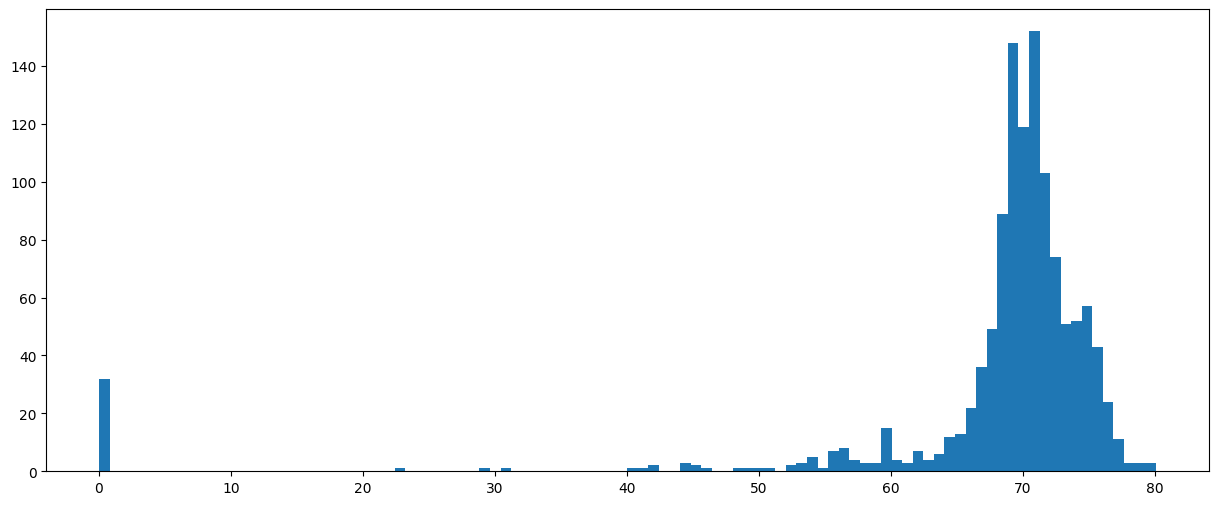

In [15]:
plt.figure(figsize=(15,6))

plt.hist(frequentation["%Freq"], bins=100)

plt.show()

In [16]:
ind = frequentation[frequentation["%Freq"]<60].index

In [17]:
frequentation.drop(ind, inplace= True)

In [18]:
frequentation[frequentation["%Freq"]<60]

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,%Freq


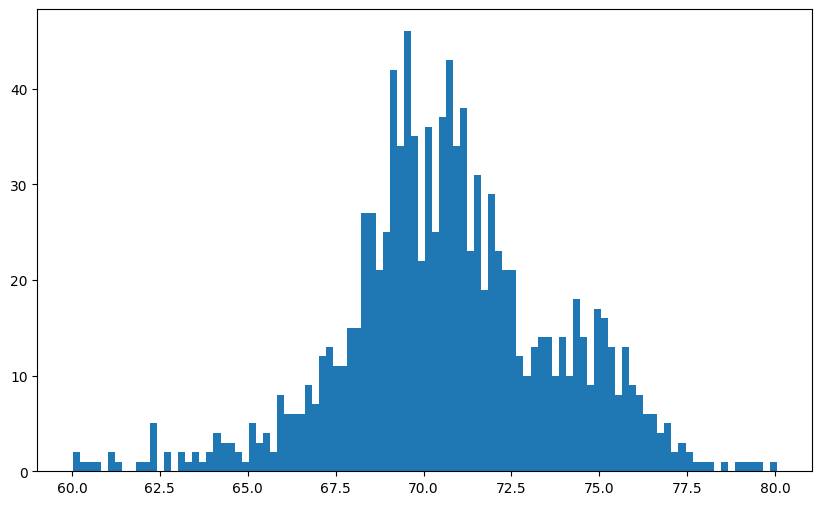

In [19]:
plt.figure(figsize=(10,6))

plt.hist(frequentation["%Freq"], bins=100)

plt.show()

In [20]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1188 non-null   int64 
 1   date        1188 non-null   object
 2   menu        1188 non-null   object
 3   porc        1188 non-null   int64 
 4   viande      1188 non-null   int64 
 5   poisson     1188 non-null   int64 
 6   bio         1188 non-null   int64 
 7   noel        1188 non-null   int64 
 8   frites      1188 non-null   int64 
 9   an_chinois  1188 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 92.9+ KB


In [21]:
menu.head()

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0


In [22]:
menu.duplicated().sum()

0

In [23]:
# identifier et supprimer les colonnes inutiles

menu = menu.drop('Unnamed: 0', axis=1)

In [24]:
menu.describe(include="all")

,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
count,1188,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
unique,1188,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367
std,NaN,NaN,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000


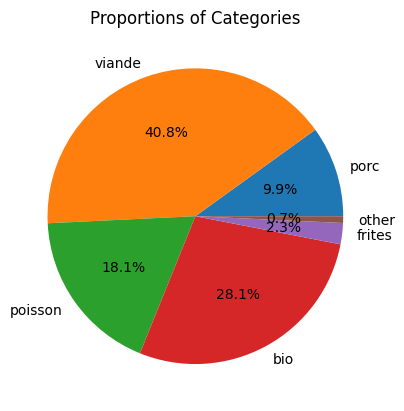

,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1183,2019-12-09,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,2019-12-10,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,2019-12-13,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,2019-12-16,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [25]:

menu['other'] = menu[['noel', 'an_chinois']].sum(axis=1)

proportions = menu[['porc', 'viande', 'poisson', 'bio', 'frites','other']].sum()

plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')

plt.title('Proportions of Categories')

plt.show()

menu.drop(['other'], axis=1)

In [26]:
df_final = pd.merge(frequentation,menu, on='date', how= 'outer', indicator=True)


<Axes: title={'center': 'Freq par mois'}, xlabel='mois', ylabel='Freq'>

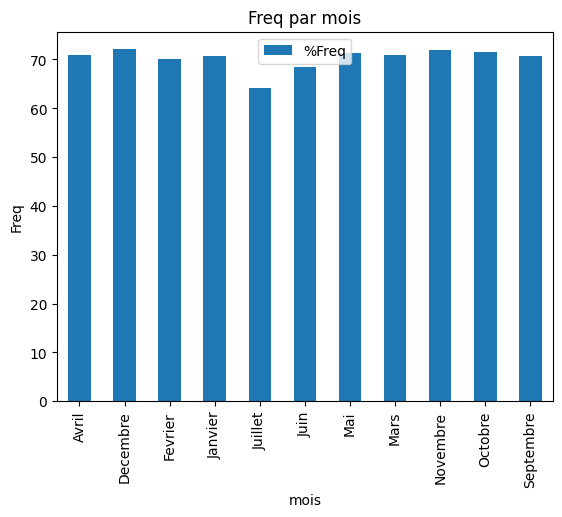

In [27]:
df_final[["mois", "%Freq"]].groupby("mois").mean().plot(kind = "bar", title="Freq par mois",ylabel="Freq")

In [28]:
#enlever les vacance
masq_july = df_final[df_final['mois'] == 'Juillet'].index
df_final.drop(masq_july, inplace = True)

masq_vacance = df_final[df_final['vacances']==1].index
df_final.drop(masq_vacance, inplace = True)

<Axes: title={'center': 'Freq par jour'}, xlabel='jour', ylabel='Freq'>

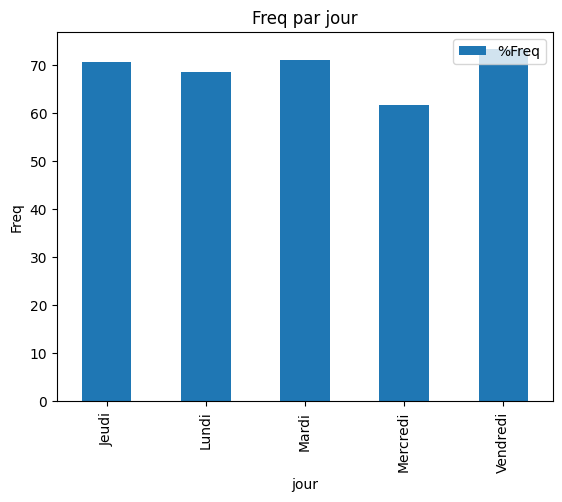

In [29]:
df_final[["jour", "%Freq"]].groupby("jour").mean().plot(kind = "bar", title="Freq par jour",ylabel="Freq")

In [30]:
#enlever les mercredis
masq_wednesday = df_final[df_final['jour'] == 'Mercredi'].index
df_final.drop(masq_wednesday, inplace = True)

<Axes: title={'center': 'Freq par greve'}, xlabel='greves', ylabel='Freq'>

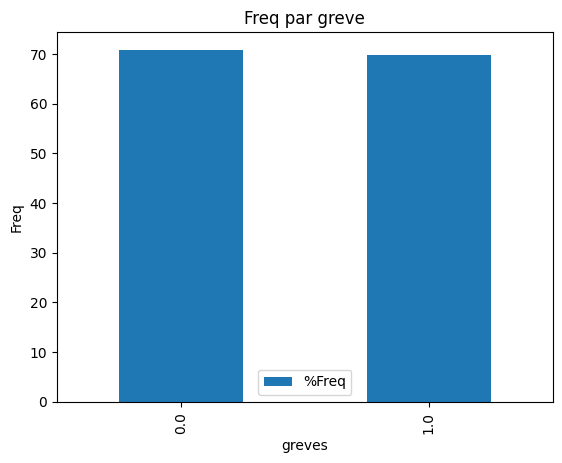

In [31]:
df_final[["greves", "%Freq"]].groupby("greves").mean().plot(kind = "bar", title="Freq par greve",ylabel="Freq",)

In [32]:
#enlever les greves
masq_greve = df_final[df_final['greves'] == 1].index
df_final.drop(masq_greve, inplace = True)

<Axes: title={'center': 'Freq par fete_juive'}, xlabel='fete_juive', ylabel='Freq'>

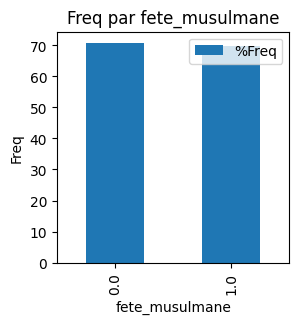

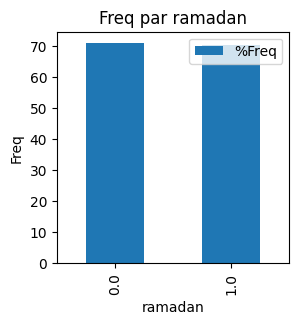

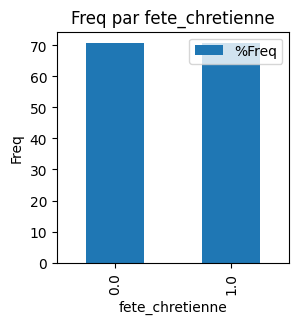

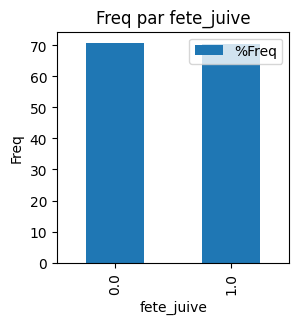

In [33]:
df_final[["fete_musulmane", "%Freq"]].groupby("fete_musulmane").mean().plot(kind ="bar", title="Freq par fete_musulmane",ylabel="Freq",figsize=(3,3))

df_final[["ramadan", "%Freq"]].groupby("ramadan").mean().plot(kind ="bar", title="Freq par ramadan",ylabel="Freq",figsize=(3,3))

df_final[["fete_chretienne", "%Freq"]].groupby("fete_chretienne").mean().plot(kind = "bar", title="Freq par fete_chretienne",ylabel="Freq",figsize=(3,3))

df_final[["fete_juive", "%Freq"]].groupby("fete_juive").mean().plot(kind = "bar", title="Freq par fete_juive",ylabel="Freq",figsize=(3,3))

In [34]:
#enlever les fetes musulmanes
masq_greve = df_final[df_final['greves'] == 1].index
df_final.drop(masq_greve, inplace = True)

In [35]:
df_final[df_final['vacances']==1]


,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,...,menu,porc,viande,poisson,bio,noel,frites,an_chinois,other,_merge


In [59]:
df_final=df_final.drop('vacances', axis=1)
df_final=df_final.drop('retour_vacances', axis=1)
df_final=df_final.drop('veille_vacances', axis=1)

KeyError: "['vacances'] not found in axis"

In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 0 to 1187
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   date             1091 non-null   object  
 1   annee_scolaire   992 non-null    object  
 2   jour             992 non-null    object  
 3   semaine          992 non-null    float64 
 4   mois             992 non-null    object  
 5   greves           992 non-null    float64 
 6   ferie            992 non-null    float64 
 7   veille_ferie     992 non-null    float64 
 8   retour_ferie     992 non-null    float64 
 9   veille_vacances  992 non-null    float64 
 10  fete_musulmane   992 non-null    float64 
 11  ramadan          992 non-null    float64 
 12  fete_chretienne  992 non-null    float64 
 13  fete_juive       992 non-null    float64 
 14  inc_grippe       992 non-null    float64 
 15  inc_gastro       992 non-null    float64 
 16  inc_varicelle    992 non-null    float64 
 17  

In [38]:
menu_r_only = df_final[df_final['_merge']=="right_only"].index

df_final.drop(menu_r_only,inplace=True)

In [60]:
df_final.head()

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,veille_vacances,...,%Freq,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,2011-01-03,2010-2011,Lundi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,64.059172,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,2011-01-04,2010-2011,Mardi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,67.967536,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2011-01-06,2010-2011,Jeudi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,67.581880,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,2011-01-07,2010-2011,Vendredi,1.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,70.926150,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,2011-01-10,2010-2011,Lundi,2.0,Janvier,0.0,0.0,0.0,0.0,0.0,...,65.054970,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both


In [40]:
df_final=df_final.drop(['other'], axis=1)

In [41]:
df_final.describe(include="all")

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,veille_vacances,...,%Freq,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
count,992,992,992,992.000000,992,992.0,992.0,992.000000,992.000000,992.000000,...,992.000000,992,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992
unique,992,10,4,NaN,10,NaN,NaN,NaN,NaN,NaN,...,NaN,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,...,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
freq,1,128,265,NaN,127,NaN,NaN,NaN,NaN,NaN,...,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992
mean,NaN,NaN,NaN,26.011089,NaN,0.0,0.0,0.009073,0.019153,0.029234,...,70.879995,NaN,0.137097,0.561492,0.262097,0.395161,0.007056,0.032258,0.003024,NaN
std,NaN,NaN,NaN,16.180954,NaN,0.0,0.0,0.094865,0.137133,0.168546,...,2.841300,NaN,0.344123,0.496455,0.439997,0.489132,0.083748,0.176774,0.054937,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,60.278474,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,11.750000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,69.116427,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,23.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,70.659048,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,41.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000,...,72.546025,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN


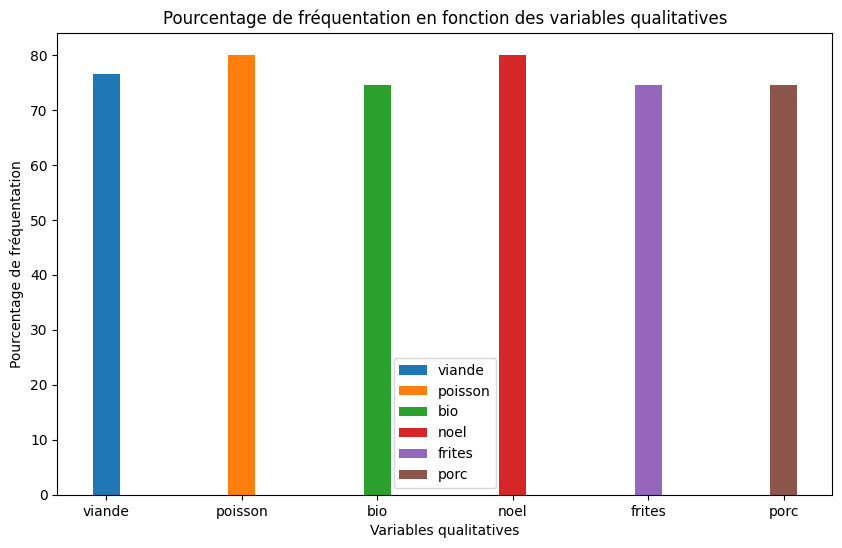

In [42]:
# Calcul du pourcentage de fréquentation pour chaque combinaison de variables qualitatives
grouped_data = df_final.groupby(['viande', 'poisson', 'bio', 'noel', 'frites', 'porc'])['%Freq'].mean().reset_index(name='pourcentage_frequence')

# Création du graphe à barres
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2

# Variables qualitatives
variables = ['viande', 'poisson', 'bio', 'noel', 'frites', 'porc']

# Position des barres sur l'axe x
x_pos = range(len(variables))

# Affichage des barres pour chaque variable
for i, variable in enumerate(variables):
    ax.bar(x_pos[i], grouped_data['pourcentage_frequence'][grouped_data[variable] == 1], bar_width, label=variable)

# Personnalisation du graphe
ax.set_xlabel('Variables qualitatives')
ax.set_ylabel('Pourcentage de fréquentation')
ax.set_title('Pourcentage de fréquentation en fonction des variables qualitatives')
ax.set_xticks(x_pos)
ax.set_xticklabels(variables)
ax.legend()

# Affichage du graphe
plt.show()

In [43]:
df_final.groupby("viande")["%Freq"].mean()

viande
0    72.466558
1    69.640937
Name: %Freq, dtype: float64

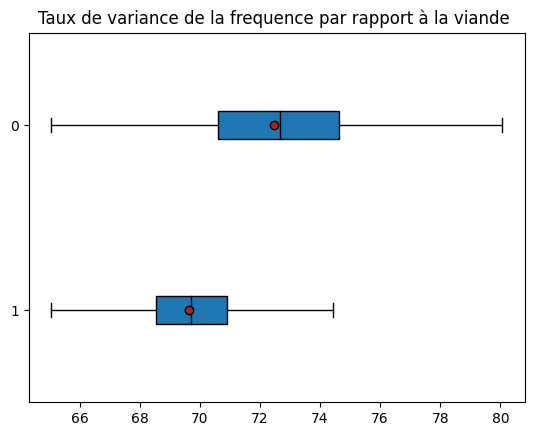

In [44]:
X = "viande"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport à la viande ")
plt.show()

In [45]:
df_final.groupby("poisson")["%Freq"].mean()

poisson
0    70.129098
1    72.994057
Name: %Freq, dtype: float64

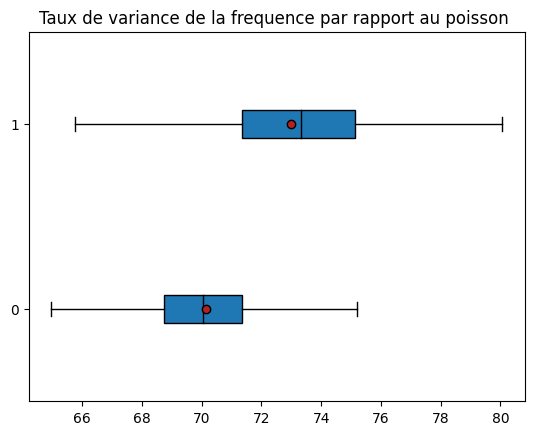

In [46]:
X = "poisson"

Y = "%Freq"

modalites = df_final["poisson"].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final["poisson"]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport au poisson ")

plt.show()

In [47]:
df_final.groupby("porc")["%Freq"].mean()

porc
0    71.078032
1    69.633525
Name: %Freq, dtype: float64

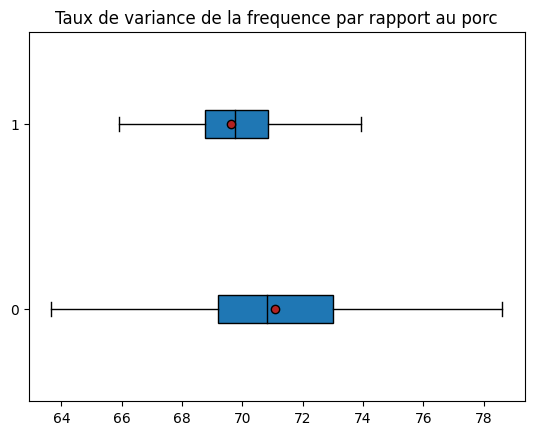

In [48]:
X = "porc"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport au porc")

plt.show()

In [49]:
df_final.groupby("bio")["%Freq"].mean()

bio
0    70.573666
1    71.348865
Name: %Freq, dtype: float64

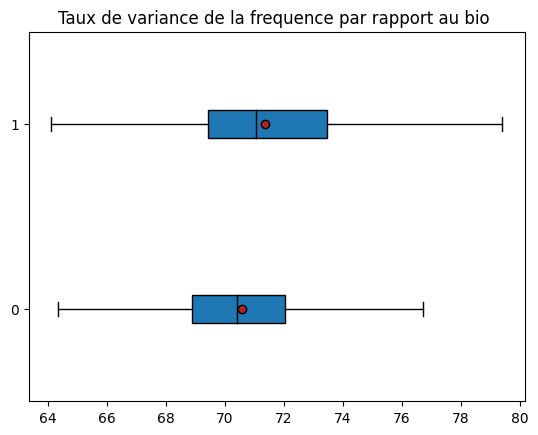

In [50]:
X = "bio"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport au bio ")

plt.show()

In [51]:
df_final.groupby("noel")["%Freq"].mean()

noel
0    70.836694
1    76.972999
Name: %Freq, dtype: float64

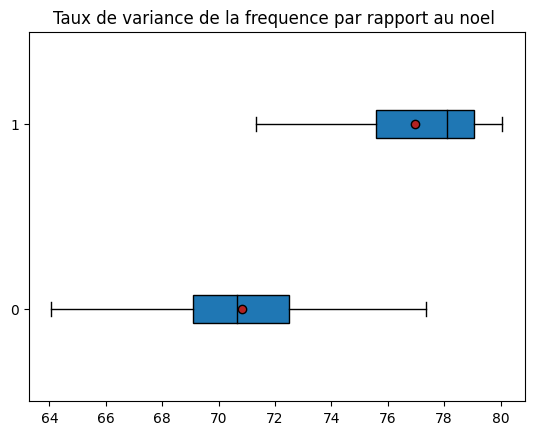

In [52]:
X = "noel"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport au noel ")

plt.show()

In [53]:
df_final.groupby("frites")["%Freq"].mean()

frites
0    70.865478
1    71.315482
Name: %Freq, dtype: float64

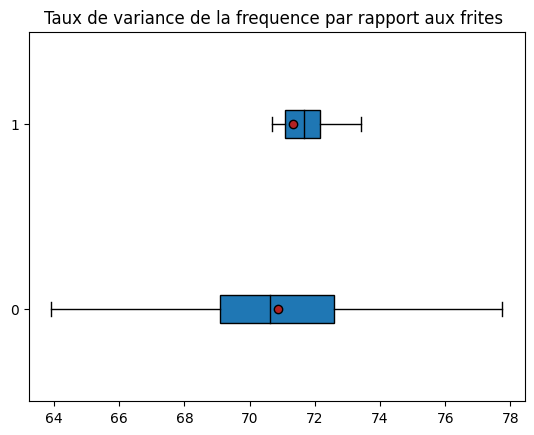

In [54]:
X = "frites"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport aux frites ")

plt.show()

In [55]:
df_final.groupby("an_chinois")["%Freq"].mean()

an_chinois
0    70.885201
1    69.163517
Name: %Freq, dtype: float64

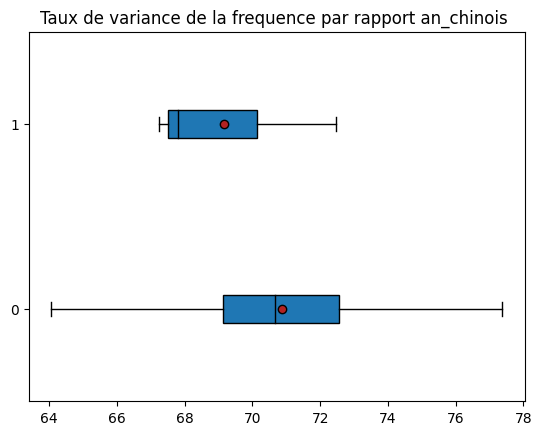

In [56]:
X = "an_chinois"

Y = "%Freq"

modalites = df_final[X].unique()

groupes =[]

for m in modalites:
    groupes.append(df_final[df_final[X]==m][Y])
    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor': 'firebrick'}

plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, vert =False, patch_artist=True,showmeans=True, meanprops=meanprops)
plt.title("Taux de variance de la frequence par rapport an_chinois ")

plt.show()

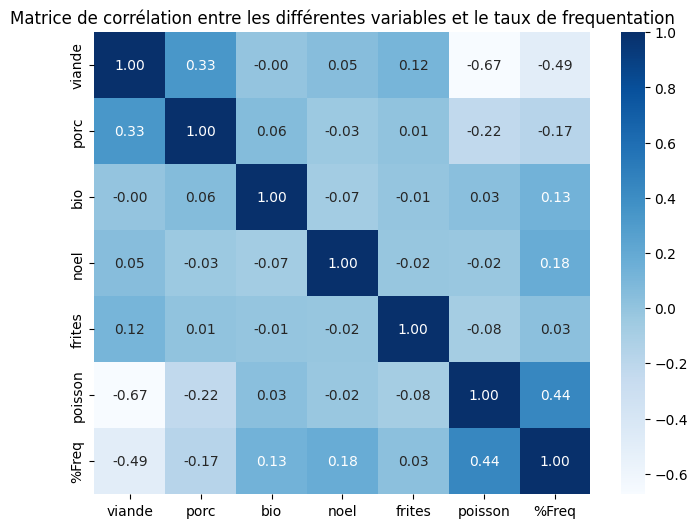

In [64]:
columns_of_interest = ["viande", "porc", "bio", "noel", "frites", "poisson", "%Freq"]

subset_data = df_final[columns_of_interest]

correlation_matrix = subset_data.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matrice de corrélation entre les différentes variables et le taux de frequentation")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
